# Day - 1 (Data Extraction + Transformation)

In [1]:
# !pip3 install requests
import requests

url = ('https://newsapi.org/v2/everything?'
       'q=Russia-Ukraine-war&'
       'from=2024-01-06&'
       'sortBy=popularity&'
       'apiKey=389ed82f1909424185318432a6a03c66')

response = requests.get(url)


In [2]:
response.ok # for status code less than 400 it returns true

True

In [3]:
response_json = response.json()

In [4]:
# !pip3 install pandas numpy
import json
import pandas as pd
import numpy as np


response_data = response_json['articles']
response_data

with open("articles.json", "w") as outfile:
    json.dump(response_data, outfile)

extracted_df = pd.read_json('articles.json')
extracted_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,UN court to hear South Africa genocide case ag...,Israel rejects South Africa's accusation that ...,https://www.bbc.co.uk/news/world-middle-east-6...,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-01-11T07:16:13Z,The UN's International Court of Justice will b...
1,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Strikes on Houthi targets in Yemen could under...,War spreading in the Middle East is not just a...,https://www.bbc.co.uk/news/world-middle-east-6...,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-01-12T13:13:32Z,"Media caption, Watch: Fighter jets strike targ..."
2,"{'id': 'business-insider', 'name': 'Business I...",jepstein@businessinsider.com (Jake Epstein),Russian glide bombs have been a huge headache ...,"The 'Drel' bomb completed testing, and serial ...",https://www.businessinsider.com/russian-glide-...,https://i.insider.com/659ef5a46979d737182228bb...,2024-01-10T20:41:40Z,Russia is moving closer toward being able to f...
3,"{'id': 'business-insider', 'name': 'Business I...",mloh@businessinsider.com (Matthew Loh),Ships in the Red Sea are declaring themselves ...,At least nine ships were found to have changed...,https://www.businessinsider.com/ships-red-sea-...,https://i.insider.com/65a4c42143bb77284b9d0c54...,2024-01-15T06:08:09Z,Several cargo ships and tankers in the Red Sea...
4,"{'id': None, 'name': 'NPR'}",The Associated Press,Zelenskyy takes center stage in Davos as he tr...,Zelenskyy is headlining a frenzied first full ...,https://www.npr.org/2024/01/16/1224878809/zele...,https://media.npr.org/assets/img/2024/01/16/ap...,2024-01-16T09:38:39Z,"Swiss Federal President Viola Amherd, left, an..."
...,...,...,...,...,...,...,...,...
95,"{'id': 'al-jazeera-english', 'name': 'Al Jazee...",Al Jazeera,Putin praises Russian ‘defenders’ as Ukraine d...,The Russian leader marked the eve of Orthodox ...,https://www.aljazeera.com/news/2024/1/7/putin-...,https://www.aljazeera.com/wp-content/uploads/2...,2024-01-07T08:37:11Z,"Celebrating Orthodox Christmas, President Vlad..."
96,"{'id': 'al-jazeera-english', 'name': 'Al Jazee...",Al Jazeera,Russia begins city evacuation as it swaps cros...,Residents of Belgorod are moved away from the ...,https://www.aljazeera.com/news/2024/1/8/russia...,https://www.aljazeera.com/wp-content/uploads/2...,2024-01-08T13:30:25Z,Russia has partially evacuated Belgorod and ha...
97,"{'id': 'al-jazeera-english', 'name': 'Al Jazee...",Al Jazeera,Zelenskyy on surprise Baltics tour to rally su...,Ukraine president's first stop is Lithuania. H...,https://www.aljazeera.com/news/2024/1/10/zelen...,https://www.aljazeera.com/wp-content/uploads/2...,2024-01-10T10:56:18Z,Ukrainian President Volodymyr Zelenskyy has ar...
98,"{'id': 'al-jazeera-english', 'name': 'Al Jazee...",Al Jazeera,"US, Ukraine, dozens more condemn alleged Russi...",Foreign ministers of nearly 50 countries say s...,https://www.aljazeera.com/news/2024/1/10/us-uk...,https://www.aljazeera.com/wp-content/uploads/2...,2024-01-10T04:17:07Z,"Dozens of countries have joined Ukraine, the U..."


In [7]:
extracted_df.drop(['source', 'author', 'urlToImage'], axis=1)

tittle_extracted = extracted_df['title']
content_extracted = extracted_df['content']
# print(len(tittle_extracted)) -- all the new tittle were less than 200 as len of this and tittle_for_analysis are same
data_for_analysis = []
for i in tittle_extracted:
    data_for_analysis.append(i)

j = 0

for i in content_extracted:
    curr_len = len(data_for_analysis[j])
    rem_len = 200 - curr_len

    data_for_analysis[j] = data_for_analysis[j] + " - " + i[:rem_len - 3]
    j += 1

In [8]:
newDf = pd.DataFrame(data_for_analysis, columns = ['Content'])
newDf = newDf.drop(newDf[newDf['Content'] == '[Removed] - [Removed]'].index) # preprocessing the data
newDf['Date'] = extracted_df['publishedAt']
newDf['Date'] = newDf['Date'].apply(lambda x : x[:10])
newDf['url'] = extracted_df['url']
newDf

,Content,Date,url
0,UN court to hear South Africa genocide case ag...,2024-01-11,https://www.bbc.co.uk/news/world-middle-east-6...
1,Strikes on Houthi targets in Yemen could under...,2024-01-12,https://www.bbc.co.uk/news/world-middle-east-6...
2,Russian glide bombs have been a huge headache ...,2024-01-10,https://www.businessinsider.com/russian-glide-...
3,Ships in the Red Sea are declaring themselves ...,2024-01-15,https://www.businessinsider.com/ships-red-sea-...
4,Zelenskyy takes center stage in Davos as he tr...,2024-01-16,https://www.npr.org/2024/01/16/1224878809/zele...
...,...,...,...
95,Palestine to Africa: How maps lie — and some t...,2024-01-15,https://www.aljazeera.com/features/2024/1/15/p...
96,Ukraine says shot down two Russian command air...,2024-01-16,https://www.aljazeera.com/news/2024/1/16/ukrai...
97,Polish truckers agree to suspend border protes...,2024-01-16,https://www.aljazeera.com/news/2024/1/16/polis...
98,South Africa’s genocide case against Israel: H...,2024-01-10,https://www.aljazeera.com/news/2024/1/10/south...


# Day - 2 ( Sentiment Analysis )

## 1st way ( Not Working )

In [9]:
# !pip3 install --upgrade tensorflow

In [10]:
# !pip3 install transformers
# !pip3 install tensorflow
# !pip3 install --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.0.0-py3-none-any.whl


# from transformers import pipeline
# sent_pipeline = pipeline("sentiment-analysis")

## 2nd way ( Bad Model )

In [11]:
# # !pip3 install vaderSentiment
# import vaderSentiment
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()

In [12]:
# senti_result = []

# for i in data_for_analysis:
#     posi = sia.polarity_scores(i)['pos']
#     negi = sia.polarity_scores(i)['neg']
#     neut = sia.polarity_scores(i)['neu']

#     if posi > negi and posi > neut:
#         senti_result.append('Good')
#     elif negi > posi and negi > neut:
#         senti_result.append('Bad')
#     else :
#         senti_result.append('Neutral')
#     # print(posi, negi, neut)


# for i in senti_result:
#     print(i)

## 3rd way ( Working )

In [13]:
# !pip3 install textblob
from textblob import TextBlob

In [14]:
def sentiment_analysis(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns 'Subjectivity' & 'Polarity'
 tweet['Subjectivity'] = tweet['Content'].apply(getSubjectivity)
 tweet ['Polarity'] = tweet['Content'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 tweet ['Analysis'] = tweet['Polarity'].apply(getAnalysis )
 return tweet


sentiment_analysis(newDf)

,Content,Date,url,Subjectivity,Polarity,Analysis
0,UN court to hear South Africa genocide case ag...,2024-01-11,https://www.bbc.co.uk/news/world-middle-east-6...,0.000000,0.000000,Neutral
1,Strikes on Houthi targets in Yemen could under...,2024-01-12,https://www.bbc.co.uk/news/world-middle-east-6...,0.000000,0.000000,Neutral
2,Russian glide bombs have been a huge headache ...,2024-01-10,https://www.businessinsider.com/russian-glide-...,0.572348,0.245455,Positive
3,Ships in the Red Sea are declaring themselves ...,2024-01-15,https://www.businessinsider.com/ships-red-sea-...,0.000000,0.000000,Neutral
4,Zelenskyy takes center stage in Davos as he tr...,2024-01-16,https://www.npr.org/2024/01/16/1224878809/zele...,0.258929,0.021429,Positive
...,...,...,...,...,...,...
95,Palestine to Africa: How maps lie — and some t...,2024-01-15,https://www.aljazeera.com/features/2024/1/15/p...,0.450000,0.400000,Positive
96,Ukraine says shot down two Russian command air...,2024-01-16,https://www.aljazeera.com/news/2024/1/16/ukrai...,0.315556,-0.062222,Negative
97,Polish truckers agree to suspend border protes...,2024-01-16,https://www.aljazeera.com/news/2024/1/16/polis...,0.000000,0.000000,Neutral
98,South Africa’s genocide case against Israel: H...,2024-01-10,https://www.aljazeera.com/news/2024/1/10/south...,0.033333,0.000000,Neutral


In [15]:
newDf = newDf.drop(['Subjectivity', 'Polarity'], axis=1)
newDf

,Content,Date,url,Analysis
0,UN court to hear South Africa genocide case ag...,2024-01-11,https://www.bbc.co.uk/news/world-middle-east-6...,Neutral
1,Strikes on Houthi targets in Yemen could under...,2024-01-12,https://www.bbc.co.uk/news/world-middle-east-6...,Neutral
2,Russian glide bombs have been a huge headache ...,2024-01-10,https://www.businessinsider.com/russian-glide-...,Positive
3,Ships in the Red Sea are declaring themselves ...,2024-01-15,https://www.businessinsider.com/ships-red-sea-...,Neutral
4,Zelenskyy takes center stage in Davos as he tr...,2024-01-16,https://www.npr.org/2024/01/16/1224878809/zele...,Positive
...,...,...,...,...
95,Palestine to Africa: How maps lie — and some t...,2024-01-15,https://www.aljazeera.com/features/2024/1/15/p...,Positive
96,Ukraine says shot down two Russian command air...,2024-01-16,https://www.aljazeera.com/news/2024/1/16/ukrai...,Negative
97,Polish truckers agree to suspend border protes...,2024-01-16,https://www.aljazeera.com/news/2024/1/16/polis...,Neutral
98,South Africa’s genocide case against Israel: H...,2024-01-10,https://www.aljazeera.com/news/2024/1/10/south...,Neutral


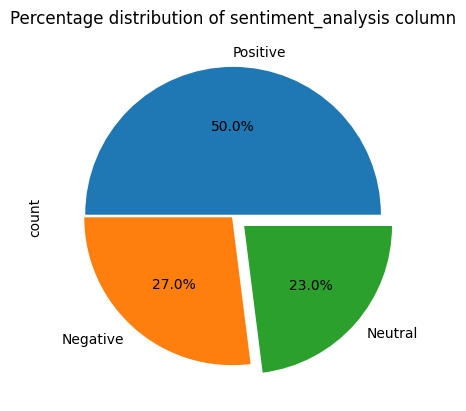

In [16]:
import matplotlib.pyplot as plt
counts = newDf['Analysis'].value_counts()
counts.plot.pie(autopct='%1.1f%%', labels=['Positive', 'Negative', 'Neutral'], explode=(0.01, 0.01, 0.1))
plt.title('Percentage distribution of sentiment_analysis column')

plt.show()

# Day 3 ( Pushing the Data to DB )

In [17]:
!pip3 install mysql-connector-python

In [18]:
import mysql.connector
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database="sentiment_analysis"
)

In [19]:
# mycursor = mydb.cursor()
# mycursor.execute("CREATE TABLE sentiments (id INT AUTO_INCREMENT PRIMARY KEY, content VARCHAR(255), date DATE, url VARCHAR(255), analysis VARCHAR(255))")

In [20]:
!pip3 install sqlalchemy

In [21]:
from sqlalchemy import create_engine

engine = create_engine("mysql+mysqlconnector://root@localhost/sentiment_analysis")
newDf.to_sql('sentiments', con=engine, if_exists='append', index=False)


-1

In [22]:
newDf[newDf['Date'] == '2024-01-07']

,Content,Date,url,Analysis
5,20-mile backup as Polish truckers blockade bor...,2024-01-07,https://www.npr.org/2024/01/07/1223065019/20-m...,Positive
14,"Russia is on course to lose 500,000 troops by ...",2024-01-07,https://www.businessinsider.com/russia-lost-50...,Positive
26,Fears grow that Ukraine could run out of US-su...,2024-01-07,https://www.businessinsider.com/ukraines-patri...,Negative
77,"Russia-Ukraine war: List of key events, day 68...",2024-01-07,https://www.aljazeera.com/news/2024/1/7/russia...,Negative
90,Putin praises Russian ‘defenders’ as Ukraine d...,2024-01-07,https://www.aljazeera.com/news/2024/1/7/putin-...,Negative


# Day 4 ( Creating API, using Flask )

In [1]:
# it is in the seprate file app.py, and the front end of that file is in templates folder